#  House Price Predicition using Machine Learning (ML)

##  Linear Regression model on kc_House_Data 

Firstly, we import our libraries and dataset and then we see the head of the data to know how the data looks like and use describe function to see the percentile’s and other key statistics.

In [1]:
import numpy as np       ###linear algebra
import pandas as pd     ###datapre-processing
from matplotlib import pyplot as plt    
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Sikkim\Downloads\kc_house_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Now , we are going to see some visualization and also going to see how and what can we infer from visualization.

Text(0, 0.5, 'Count')

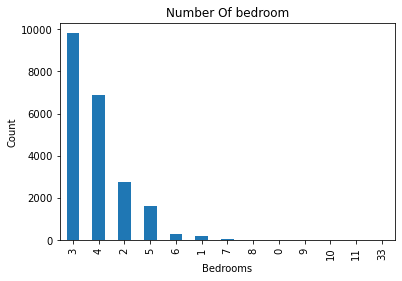

In [9]:
df['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number Of bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')


In [44]:
df.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,NaN,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,-0.016797,NaN,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,...,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,NaN,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,...,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,NaN,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,...,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,NaN,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,NaN,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,NaN,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,NaN,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,NaN,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


As we can see from the visualization 3 bedroom houses are most commonly sold followed by 4 bedroom.

<AxesSubplot:>

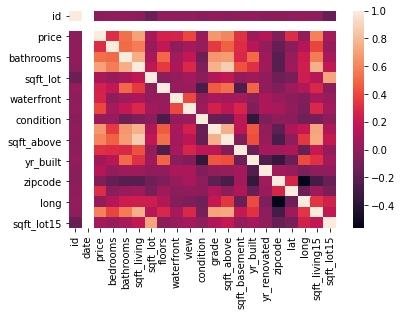

In [45]:
sns.heatmap(df.corr())

### Visualizing the location of the houses based on latitude and longitude.

So according to the dataset , we have latitude and longitude on the dataset for each house. We are going to see the common location and how the houses are placed.
We use seaborn , and we get his beautiful visualization. Joinplot function helps us see the concentration of data and placement of data and can be really useful.

C:\Users\Sikkim\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

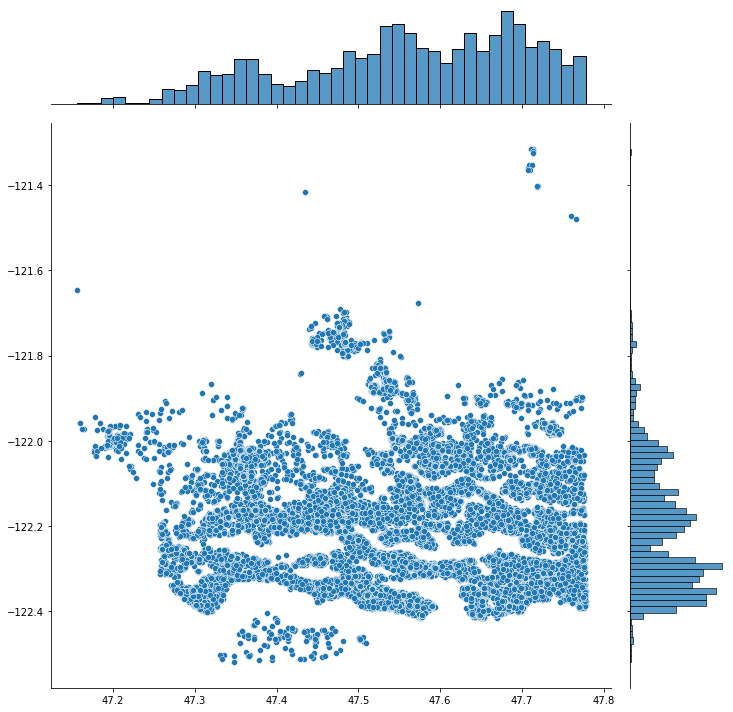

In [43]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude', fontsize = 12)
plt.show()
##sns.despine

For latitude between -47.7 and -48.8 there are many houses , which would mean that maybe it’s an ideal location isn’t it ? But when we talk about longitude we can see that concentration is high between -122.2 to -122.4.

#### How common factors are affecting the price of the houses ?

catter plot helps us to see how our data points are scattered and are usually used for two variables. From the first figure we can see that more the living area , more the price though data is concentrated towards a particular price zone , but from the figure we can see that the data points seem to be in linear direction.

Text(0.5, 1.0, 'Price  Vs  Square feet')

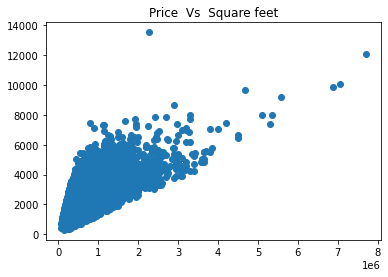

In [14]:
plt.scatter(df.price,df.sqft_living)
plt.title("Price  Vs  Square feet")

 The second figure tells us about the location of the houses in terms of longitude and it gives us quite an interesting observation that -122.2 to -122.4 sells houses at much higher amount.

Text(0.5, 1.0, 'Price  Vs location of the Area')

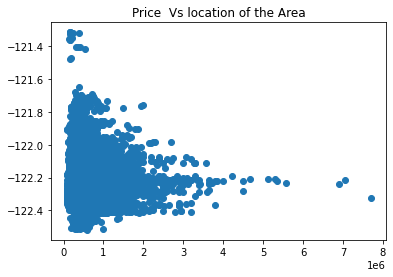

In [15]:
plt.scatter(df.price, df.long)
plt.title('Price  Vs location of the Area')

We can see more factors affecting the price


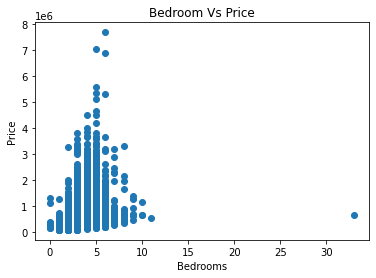

In [16]:
plt.scatter(df.bedrooms, df.price)
plt.title('Bedroom Vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

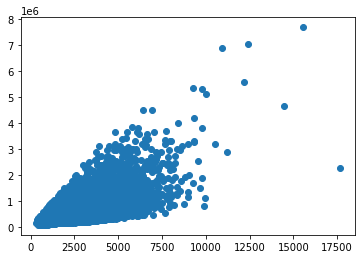

In [17]:
plt.scatter((df['sqft_living']+df['sqft_basement']),df['price'])

Text(0.5, 1.0, 'Waterfront  Vs  price')

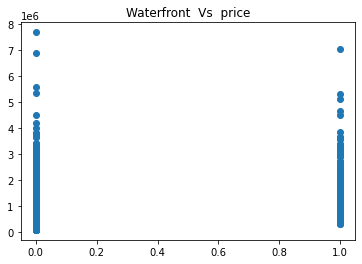

In [18]:
plt.scatter(df.waterfront, df.price)
plt.title('Waterfront  Vs  price')

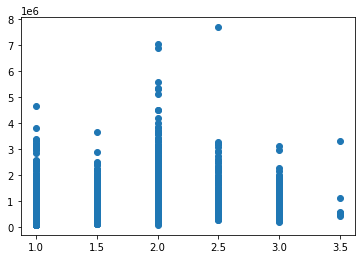

In [19]:
plt.scatter(df.floors, df.price)

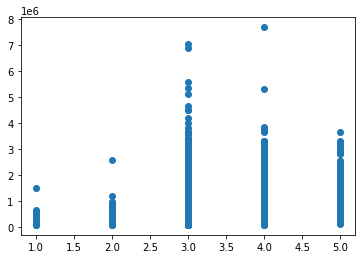

In [20]:
plt.scatter(df.condition, df.price)

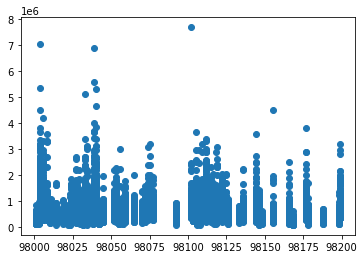

In [21]:
plt.scatter(df.zipcode, df.price)

### Linear Regression 

In easy words a model in statistics which helps us predicts the future based upon past relationship of variables. 

Regression works on the line equation , y=mx+c , trend line is set through the data points to predict the outcome.

The variable we are predicting is called the criterion variable and is referred to as Y. The variable we are basing our predictions on is called the predictor variable and is referred to as X. When there is only one predictor variable, the prediction method is called Simple Regression.

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [24]:
labels = df['price']
conv_dates = [1 if values == 2014 else 0 for values in df.date]
df['date'] = conv_dates
train1 = df.drop(['id', 'price'], axis = 1)

In [26]:
from sklearn.model_selection import train_test_split

We use train data and test data , train data to train our machine and test data to see if it has learnt the data well or not.

Now we know that prices are to be predicted , hence we set labels (output) as price columns and we also convert dates to 1’s and 0’s so that it doesn’t influence our data much . We use 0 for houses which are new that is built after 2014.

We have made my train data as 90% and 10% of the data to be my test data , and randomized the splitting of data by using random_state.

In [27]:
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size = 0.10, random_state = 2)
reg.fit(x_train, y_train)

LinearRegression()

In [28]:
reg.score(x_test, y_test)

0.7320721056067906

After fitting our data to the model we can check the score of our data i.e., in this case the prediction is 73%